In [214]:
# # 한글 깨짐 방지를 위해 폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [215]:
# # install folium
# !pip install folium
# !pip install --upgrade pandas


In [216]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import os,re
import folium # for visual map creation
import json
import requests
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
plt.rc('font', family='NanumBarunGothic')
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 폰트
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import glob as glob

# # 나눔글꼴 경로 설정
# font_path = 'C:/USERS/ghjar/AppData/Local/Microsoft/Windows/Fonts/NanumGothic.ttc'

# # 폰트 이름 가져오기
# font_name = fm.FontProperties(fname=font_path).get_name()

# # 폰트 설정
# plt.rc('font', family=font_name)

In [217]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

# check content
!ls /content/drive/MyDrive/daegu/data

os.chdir('/content/drive/MyDrive/daegu/data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 daegu-air-condition-20221231.csv
 daegu-subway-circulation-20230531.csv
 daegu-subway-location-20220916.csv
 daegu-subway-monthly-personnel-20230531.csv
 metro_full2.csv
 metro_full.csv
'대구교통공사_공조설비 현황_20230430.csv'
'대구교통공사_역사 면적_20230430.csv'
'대구교통공사_역사심도 및 높이_20161231.csv'
 좌표.csv


### 데이터 전처리

In [218]:
면적 = pd.read_csv('/content/drive/MyDrive/daegu/data/대구교통공사_역사 면적_20230430.csv', encoding='euc-kr')
면적.head()

,호선,역사명,계(제곱미터),지상4층(제곱미터),지상3층(제곱미터),지상2층(제곱미터),지상1층(제곱미터),출입구(외부계단_통로)(제곱미터),지하1층(제곱미터),지하2층(제곱미터),지하3층(제곱미터),지하4층(제곱미터),지하5층(제곱미터)
0,1,설화명곡,8949.66,NaN,NaN,NaN,NaN,NaN,3962.72,2709.87,2277.07,NaN,NaN
1,1,화 원,7477.15,NaN,NaN,NaN,NaN,NaN,2826.31,2275.00,2375.84,NaN,NaN
2,1,대 곡,5888.36,NaN,NaN,NaN,NaN,NaN,938.91,3045.92,1903.53,NaN,NaN
3,1,진 천,5181.09,NaN,NaN,NaN,NaN,NaN,3385.21,1795.88,NaN,NaN,NaN
4,1,월 배,5013.82,NaN,NaN,NaN,NaN,NaN,3226.86,1786.96,NaN,NaN,NaN


In [219]:
면적 = 면적.drop(['지상4층(제곱미터)', '지상3층(제곱미터)', '지상2층(제곱미터)','지상1층(제곱미터)', '출입구(외부계단_통로)(제곱미터)','지하1층(제곱미터)', '지하2층(제곱미터)','지하3층(제곱미터)', '지하4층(제곱미터)','지하5층(제곱미터)'], axis=1)
면적.head()

,호선,역사명,계(제곱미터)
0,1,설화명곡,8949.66
1,1,화 원,7477.15
2,1,대 곡,5888.36
3,1,진 천,5181.09
4,1,월 배,5013.82


In [220]:
면적 = 면적.rename(columns={'역사명': '역명', '계(제곱미터)': '면적'})
면적.head()

,호선,역명,면적
0,1,설화명곡,8949.66
1,1,화 원,7477.15
2,1,대 곡,5888.36
3,1,진 천,5181.09
4,1,월 배,5013.82


In [221]:
면적.역명 = 면적.역명.str.replace(" ", "") #역명 공백 제거
면적.head()

,호선,역명,면적
0,1,설화명곡,8949.66
1,1,화원,7477.15
2,1,대곡,5888.36
3,1,진천,5181.09
4,1,월배,5013.82


In [222]:
깊이 = pd.read_csv('/content/drive/MyDrive/daegu/data/대구교통공사_역사심도 및 높이_20161231.csv', encoding='euc-kr')
깊이.head()

,호선,역 명,역사심도(지상-도상바닥)_(단위_미터)
0,1,설화명곡,25.6
1,1,화원,23.2
2,1,대 곡,17.2
3,1,진 천,15.7
4,1,월 배,12.8


In [223]:
깊이 = 깊이.rename(columns={'역 명': '역명', '역사심도(지상-도상바닥)_(단위_미터)': '정거장깊이'})
깊이.head()

,호선,역명,정거장깊이
0,1,설화명곡,25.6
1,1,화원,23.2
2,1,대 곡,17.2
3,1,진 천,15.7
4,1,월 배,12.8


In [224]:
깊이.역명 = 깊이.역명.str.replace(" ", "") #역명 공백 제거
깊이.head()

,호선,역명,정거장깊이
0,1,설화명곡,25.6
1,1,화원,23.2
2,1,대곡,17.2
3,1,진천,15.7
4,1,월배,12.8


In [225]:
공조설비 = pd.read_csv('/content/drive/MyDrive/daegu/data/대구교통공사_공조설비 현황_20230430.csv', encoding='euc-kr')
공조설비.head()

,호선,역사,단 위,냉동기,공기조화기,히트펌프,패키지 에어컨,항온항습기,본선송풍기,자동에어필터,자동세정형필터
0,1,설화명곡,대,2,4,1,3,0,10,0,2
1,1,화원,대,2,4,1,7,0,6,0,2
2,1,대곡,대,1,4,1,1,0,10,0,2
3,1,진천,대,1,3,1,1,0,8,0,2
4,1,월배,대,1,3,1,1,0,8,0,2


In [226]:
공조설비 = 공조설비.drop(['단 위', '냉동기', '히트펌프','패키지 에어컨', '항온항습기','본선송풍기', '자동에어필터','자동세정형필터'], axis=1)
공조설비.head()

,호선,역사,공기조화기
0,1,설화명곡,4
1,1,화원,4
2,1,대곡,4
3,1,진천,3
4,1,월배,3


In [227]:
공조설비 = 공조설비.rename(columns={'역사': '역명', '공기조화기': '환기구'})
공조설비.head()

,호선,역명,환기구
0,1,설화명곡,4
1,1,화원,4
2,1,대곡,4
3,1,진천,3
4,1,월배,3


In [228]:
면적깊이 = pd.merge(면적, 깊이, how = 'inner', on =['호선', '역명'])
건축정보 = pd.merge(면적깊이, 공조설비, how = 'inner', on =['호선', '역명'])
건축정보.head()

,호선,역명,면적,정거장깊이,환기구
0,1,설화명곡,8949.66,25.6,4
1,1,화원,7477.15,23.2,4
2,1,대곡,5888.36,17.2,4
3,1,진천,5181.09,15.7,3
4,1,월배,5013.82,12.8,3


In [229]:
건축정보.shape

(61, 5)

In [230]:
공기질 = pd.read_csv('/content/drive/MyDrive/daegu/data/daegu-air-condition-20221231.csv', encoding='euc-kr')
공기질.head()

,역명,PM10(기준100마이크로그램_세제곱미터 이하),PM2.5(기준50마이크로그램_세제곱미터 이하),"CO2(기준1,000피피엠 이하)",HCHO(기준100마이크로그램_세제곱미터 이하),CO(기준10피피엠 이하),NO2(기준0.1피피엠 이하),Rn(기준148베크렐_세제곱미터 이하),VOC(기준500마이크로그램_세제곱미터 이하)
0,각산,20.3,7.7,518,3.0,0.7,미측정,미측정,미측정
1,감삼,12.9,6.7,814,3.2,1.2,0.017,37,21.9
2,강창,11.2,5.6,465,7.7,1.0,0.015,24.333,30
3,경대병원,26.9,18.3,734,7.0,1.7,0.023,11.333,100.267
4,계명대,14.2,8.6,569,6.1,0.8,0.015,28.333,56


In [231]:
승객 = pd.read_csv('/content/drive/MyDrive/daegu/data/daegu-subway-monthly-personnel-20230531.csv', encoding='euc-kr')
승객.head()

,년,월,설화명곡,화원,대곡,진천,월배,상인,월촌,송현,...,건들바위,대봉교,수성시장,수성구민운동장,어린이회관,황금,수성못,지산,범물,용지
0,1997,11,0,0,0,52042,22003,45814,29193,19727,...,0,0,0,0,0,0,0,0,0,0
1,1997,12,0,0,0,191050,106584,233005,131793,106512,...,0,0,0,0,0,0,0,0,0,0
2,1998,1,0,0,0,164212,93112,203852,107486,96989,...,0,0,0,0,0,0,0,0,0,0
3,1998,2,0,0,0,145247,88743,197313,107783,93817,...,0,0,0,0,0,0,0,0,0,0
4,1998,3,0,0,0,155849,95529,212187,133677,100144,...,0,0,0,0,0,0,0,0,0,0


In [232]:
혼잡 = pd.read_csv('/content/drive/MyDrive/daegu/data/daegu-subway-circulation-20230531.csv', encoding='euc-kr')
혼잡.head()

,월,일,역번호,역명,승하차,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,일계
0,1,1,1150,설화명곡,승차,26,39,63,105,132,...,219,211,216,119,122,58,48,26,3,2426
1,1,1,1150,설화명곡,하차,0,65,49,55,90,...,193,184,218,175,165,140,168,101,57,2276
2,1,1,1160,화원,승차,19,44,40,115,129,...,302,254,230,136,80,60,59,34,2,2760
3,1,1,1160,화원,하차,4,57,44,76,116,...,276,209,198,180,139,88,98,106,70,2772
4,1,1,1170,대곡,승차,26,48,66,117,149,...,187,182,160,127,89,61,60,38,9,2327


In [233]:
좌표 = pd.read_csv('/content/drive/MyDrive/daegu/data/daegu-subway-location-20220916.csv')
좌표.head()

,field1,field2,field3,field4,field5,_GC_TYPE,_X,_Y
0,대구도시철도공사,1호선,대곡,대구광역시 달서구 비슬로 지하 2718,053-644-7723,정,128.512486,35.809438
1,대구도시철도공사,1호선,교대,대구광역시 남구 중앙대로 지하 194(대명동),053-473-7702,정,128.590596,35.850095
2,대구도시철도공사,1호선,각산,대구광역시 동구 안심로 지하 363(신서동),053-963-7754,정,128.724166,35.868002
3,대구도시철도공사,1호선,대구역,대구광역시 북구 칠성남로30길 지하 24,053-426-7797,정,128.597216,35.876344
4,대구도시철도공사,1호선,대명,대구광역시 남구 대명로 지하71,053-627-7746,정,128.565379,35.839315


### 총승객수

In [234]:
# 승객 0 들어간 데이터 삭제
승객 = 승객.replace(0, np.NaN)
승객 = 승객.dropna(axis=0)
승객.head()

,년,월,설화명곡,화원,대곡,진천,월배,상인,월촌,송현,...,건들바위,대봉교,수성시장,수성구민운동장,어린이회관,황금,수성못,지산,범물,용지
226,2016,9,89238.0,76096.0,239113.0,204619,129255,382194,154904,116226,...,39284.0,93402.0,78105.0,55998.0,37482.0,87695.0,76993.0,73308.0,118955.0,67463.0
227,2016,10,124517.0,105048.0,225808.0,224114,141283,414902,167245,127047,...,42541.0,102943.0,86080.0,62864.0,42956.0,94112.0,77249.0,79714.0,126913.0,72064.0
228,2016,11,126449.0,102550.0,224383.0,223095,139938,411465,168987,127419,...,41560.0,96705.0,86780.0,61382.0,41576.0,94381.0,72798.0,78910.0,123919.0,70404.0
229,2016,12,132989.0,108437.0,223203.0,233915,146186,435617,173477,131386,...,41501.0,101132.0,87502.0,64927.0,41323.0,97464.0,73410.0,79031.0,131045.0,69861.0
230,2017,1,122180.0,102113.0,206491.0,213326,132877,399208,147353,118333,...,36993.0,95082.0,77045.0,56938.0,35012.0,88217.0,62381.0,69713.0,121201.0,64040.0


In [235]:

# 2023년 1-5월 삭제
승객 = 승객.iloc[:-5]
승객.tail()



,년,월,설화명곡,화원,대곡,진천,월배,상인,월촌,송현,...,건들바위,대봉교,수성시장,수성구민운동장,어린이회관,황금,수성못,지산,범물,용지
297,2022,8,121638.0,101802.0,130311.0,216346,115358,297594,116963,98729,...,41154.0,75232.0,75583.0,43940.0,30466.0,80008.0,62675.0,58529.0,107510.0,63687.0
298,2022,9,126273.0,108947.0,136834.0,226092,119045,306224,122177,100185,...,41860.0,77207.0,77701.0,47597.0,32462.0,82137.0,81926.0,60242.0,110187.0,65185.0
299,2022,10,136483.0,117092.0,147667.0,243144,126624,324036,128698,105402,...,46445.0,82246.0,80962.0,50987.0,35539.0,87470.0,78229.0,64908.0,116447.0,69821.0
300,2022,11,134784.0,115688.0,149616.0,242124,125486,325592,127958,104654,...,46085.0,79376.0,82308.0,50675.0,35862.0,88280.0,70556.0,63928.0,113521.0,69129.0
301,2022,12,134530.0,117324.0,144573.0,246714,127618,338031,129107,106054,...,44806.0,77741.0,80832.0,50571.0,34789.0,87756.0,72154.0,63247.0,113055.0,68018.0


In [236]:
승객.shape

(76, 90)

In [237]:
# 2016 9-12월
승객 = 승객.iloc[64:]
승객.head(20)

,년,월,설화명곡,화원,대곡,진천,월배,상인,월촌,송현,...,건들바위,대봉교,수성시장,수성구민운동장,어린이회관,황금,수성못,지산,범물,용지
290,2022,1,111285.0,97913.0,152678.0,178978,113083,284815,110082,95864,...,32679.0,70814.0,70118.0,42781.0,26242.0,73662.0,59864.0,55456.0,100179.0,56108.0
291,2022,2,95442.0,80353.0,105813.0,166973,94373,237814,92665,81848,...,26629.0,58599.0,60522.0,34910.0,21313.0,62587.0,49491.0,47221.0,81965.0,46923.0
292,2022,3,115357.0,98782.0,123810.0,202160,110945,283912,114886,95819,...,33287.0,70903.0,71756.0,42330.0,26975.0,75199.0,61528.0,56784.0,98825.0,55142.0
293,2022,4,125411.0,106463.0,133056.0,217045,118340,301373,124294,99931,...,39717.0,76116.0,76593.0,46794.0,30570.0,79625.0,75524.0,60671.0,105710.0,61118.0
294,2022,5,137089.0,119341.0,149369.0,241796,129442,339515,133435,109521,...,46096.0,83007.0,83268.0,50654.0,34457.0,87604.0,76237.0,66307.0,116943.0,67679.0
295,2022,6,130202.0,113456.0,140201.0,227255,122586,314367,127010,104386,...,44798.0,78662.0,80851.0,48393.0,33116.0,84391.0,68446.0,63585.0,111343.0,67641.0
296,2022,7,130921.0,111912.0,139661.0,231366,122171,316584,125302,104192,...,44596.0,80024.0,80211.0,46415.0,32817.0,83331.0,64813.0,63238.0,113642.0,68028.0
297,2022,8,121638.0,101802.0,130311.0,216346,115358,297594,116963,98729,...,41154.0,75232.0,75583.0,43940.0,30466.0,80008.0,62675.0,58529.0,107510.0,63687.0
298,2022,9,126273.0,108947.0,136834.0,226092,119045,306224,122177,100185,...,41860.0,77207.0,77701.0,47597.0,32462.0,82137.0,81926.0,60242.0,110187.0,65185.0
299,2022,10,136483.0,117092.0,147667.0,243144,126624,324036,128698,105402,...,46445.0,82246.0,80962.0,50987.0,35539.0,87470.0,78229.0,64908.0,116447.0,69821.0


In [238]:
승객 = 승객.melt(id_vars=['년', '월'], var_name='역명', value_name='승객수')
승객.head(20)

,년,월,역명,승객수
0,2022,1,설화명곡,111285.0
1,2022,2,설화명곡,95442.0
2,2022,3,설화명곡,115357.0
3,2022,4,설화명곡,125411.0
4,2022,5,설화명곡,137089.0
5,2022,6,설화명곡,130202.0
6,2022,7,설화명곡,130921.0
7,2022,8,설화명곡,121638.0
8,2022,9,설화명곡,126273.0
9,2022,10,설화명곡,136483.0


In [239]:
승객2 = 승객.drop(['년', '월','역명'], axis=1)
승객2.head(20)

,승객수
0,111285.0
1,95442.0
2,115357.0
3,125411.0
4,137089.0
5,130202.0
6,130921.0
7,121638.0
8,126273.0
9,136483.0


In [240]:
승객2.shape


(1056, 1)

In [241]:
승객2 = 승객2.groupby(승객2.index // 12).sum()
승객2.shape

(88, 1)

In [242]:
승객 = 승객.drop(['월', '승객수'], axis=1)
승객

,년,역명
0,2022,설화명곡
1,2022,설화명곡
2,2022,설화명곡
3,2022,설화명곡
4,2022,설화명곡
...,...,...
1051,2022,용지
1052,2022,용지
1053,2022,용지
1054,2022,용지


In [243]:
duplicate_rows_df = 승객[승객.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (968, 2)


In [244]:
승객.drop_duplicates(inplace=True)
승객.head()

,년,역명
0,2022,설화명곡
12,2022,화원
24,2022,대곡
36,2022,진천
48,2022,월배


In [245]:
승객.reset_index(drop=True, inplace=True)
승객.head()

,년,역명
0,2022,설화명곡
1,2022,화원
2,2022,대곡
3,2022,진천
4,2022,월배


In [246]:
승객['총승객수'] = 승객2
승객.head(50)

,년,역명,총승객수
0,2022,설화명곡,1499415.0
1,2022,화원,1289073.0
2,2022,대곡,1653589.0
3,2022,진천,2639993.0
4,2022,월배,1425071.0
5,2022,상인,3669857.0
6,2022,월촌,1452577.0
7,2022,송현,1206585.0
8,2022,서부정류장,2763049.0
9,2022,대명,993092.0


In [247]:
승객.tail()

,년,역명,총승객수
83,2022,황금,972050.0
84,2022,수성못,821443.0
85,2022,지산,724116.0
86,2022,범물,1289327.0
87,2022,용지,758479.0


In [248]:
승객 = 승객.loc[:,['역명', '총승객수']]
승객.head()

,역명,총승객수
0,설화명곡,1499415.0
1,화원,1289073.0
2,대곡,1653589.0
3,진천,2639993.0
4,월배,1425071.0


### 혼잡

In [249]:
혼잡 = 혼잡.drop('승하차', axis=1)
혼잡 = 혼잡.groupby("역명").mean().reset_index() #혼잡도의 평균을 구함
혼잡['평균혼잡도'] = 혼잡.loc[:, "05시-06시":].mean(axis = 1)
혼잡 = 혼잡.loc[:, ['역명','평균혼잡도']]
혼잡.head()

,역명,평균혼잡도
0,각산,393.579470
1,감삼,659.281457
2,강창,613.278477
3,건들바위,151.530464
4,경대병원,671.752980


### 좌표

In [250]:
좌표 = 좌표.rename(columns={'field3': '역명', '_X': '위도', '_Y': '경도', 'field2': '호선'})
좌표.head()

,field1,호선,역명,field4,field5,_GC_TYPE,위도,경도
0,대구도시철도공사,1호선,대곡,대구광역시 달서구 비슬로 지하 2718,053-644-7723,정,128.512486,35.809438
1,대구도시철도공사,1호선,교대,대구광역시 남구 중앙대로 지하 194(대명동),053-473-7702,정,128.590596,35.850095
2,대구도시철도공사,1호선,각산,대구광역시 동구 안심로 지하 363(신서동),053-963-7754,정,128.724166,35.868002
3,대구도시철도공사,1호선,대구역,대구광역시 북구 칠성남로30길 지하 24,053-426-7797,정,128.597216,35.876344
4,대구도시철도공사,1호선,대명,대구광역시 남구 대명로 지하71,053-627-7746,정,128.565379,35.839315


In [251]:
좌표 = 좌표.drop(['field1','field4', 'field5', '_GC_TYPE'], axis=1)
좌표.head()


,호선,역명,위도,경도
0,1호선,대곡,128.512486,35.809438
1,1호선,교대,128.590596,35.850095
2,1호선,각산,128.724166,35.868002
3,1호선,대구역,128.597216,35.876344
4,1호선,대명,128.565379,35.839315


In [252]:
좌표['호선'] = 좌표['호선'].str.extract(r'(\d+)')
좌표.head()

,호선,역명,위도,경도
0,1,대곡,128.512486,35.809438
1,1,교대,128.590596,35.850095
2,1,각산,128.724166,35.868002
3,1,대구역,128.597216,35.876344
4,1,대명,128.565379,35.839315


### 공기질

In [253]:

공기질 = 공기질.rename(columns={'PM10(기준100마이크로그램_세제곱미터 이하)': '미세먼지', 'CO(기준10피피엠 이하)': '일산화탄소'})
공기질.head()

,역명,미세먼지,PM2.5(기준50마이크로그램_세제곱미터 이하),"CO2(기준1,000피피엠 이하)",HCHO(기준100마이크로그램_세제곱미터 이하),일산화탄소,NO2(기준0.1피피엠 이하),Rn(기준148베크렐_세제곱미터 이하),VOC(기준500마이크로그램_세제곱미터 이하)
0,각산,20.3,7.7,518,3.0,0.7,미측정,미측정,미측정
1,감삼,12.9,6.7,814,3.2,1.2,0.017,37,21.9
2,강창,11.2,5.6,465,7.7,1.0,0.015,24.333,30
3,경대병원,26.9,18.3,734,7.0,1.7,0.023,11.333,100.267
4,계명대,14.2,8.6,569,6.1,0.8,0.015,28.333,56


In [254]:
공기질['미세먼지'] /=100
공기질['일산화탄소'] /=10
공기질['공기질점수'] = 공기질.loc[:, "미세먼지":"일산화탄소"].sum(axis=1)
공기질.head()

,역명,미세먼지,PM2.5(기준50마이크로그램_세제곱미터 이하),"CO2(기준1,000피피엠 이하)",HCHO(기준100마이크로그램_세제곱미터 이하),일산화탄소,NO2(기준0.1피피엠 이하),Rn(기준148베크렐_세제곱미터 이하),VOC(기준500마이크로그램_세제곱미터 이하),공기질점수
0,각산,0.203,7.7,518,3.0,0.07,미측정,미측정,미측정,528.973
1,감삼,0.129,6.7,814,3.2,0.12,0.017,37,21.9,824.149
2,강창,0.112,5.6,465,7.7,0.10,0.015,24.333,30,478.512
3,경대병원,0.269,18.3,734,7.0,0.17,0.023,11.333,100.267,759.739
4,계명대,0.142,8.6,569,6.1,0.08,0.015,28.333,56,583.922


In [255]:
공기질.drop(['미세먼지', '일산화탄소', 'PM2.5(기준50마이크로그램_세제곱미터 이하)','HCHO(기준100마이크로그램_세제곱미터 이하)','CO2(기준1,000피피엠 이하)','NO2(기준0.1피피엠 이하)','Rn(기준148베크렐_세제곱미터 이하)','VOC(기준500마이크로그램_세제곱미터 이하)'], axis=1, inplace=True)
공기질.head()

,역명,공기질점수
0,각산,528.973
1,감삼,824.149
2,강창,478.512
3,경대병원,759.739
4,계명대,583.922


### 데이터 합치기

In [256]:
merge1 = pd.merge(혼잡, 좌표, how = 'inner', on =['역명'])
merge1.shape

(91, 5)

In [257]:
merge2 = pd.merge(merge1, 공기질, how = 'inner', on =['역명'])
merge2.shape

(54, 6)

In [258]:
merge3 = pd.merge(merge2, 승객, how = 'inner', on =['역명'])
merge3.shape

(54, 7)

In [259]:
merge4 = pd.merge(merge3, 건축정보, how = 'inner', on =['역명'])
merge4.shape

(51, 11)

In [260]:
merge4 = merge4.rename(columns={'호선_x': '호선', '호선_y': '호선X'})
merge4 = merge4.drop('호선X', axis=1)
merge4.head()

,역명,평균혼잡도,호선,위도,경도,공기질점수,총승객수,면적,정거장깊이,환기구
0,각산,393.579470,1,128.724166,35.868002,528.973,1374253.0,4976.20,13.3,3
1,감삼,659.281457,2,128.547903,35.854235,824.149,2334632.0,6136.40,21.1,4
2,강창,613.278477,2,128.478343,35.853078,478.512,2186717.0,10347.25,21.9,4
3,경대병원,671.752980,2,128.602800,35.863201,759.739,2101386.0,10519.77,21.8,4
4,계명대,649.383775,2,128.491979,35.851504,583.922,2295592.0,10795.48,18.9,4


In [261]:
metro_full = merge4[['호선','역명','총승객수','평균혼잡도','공기질점수', '면적', '정거장깊이', '환기구', '위도','경도']]
metro_full.head()

,호선,역명,총승객수,평균혼잡도,공기질점수,면적,정거장깊이,환기구,위도,경도
0,1,각산,1374253.0,393.579470,528.973,4976.20,13.3,3,128.724166,35.868002
1,2,감삼,2334632.0,659.281457,824.149,6136.40,21.1,4,128.547903,35.854235
2,2,강창,2186717.0,613.278477,478.512,10347.25,21.9,4,128.478343,35.853078
3,2,경대병원,2101386.0,671.752980,759.739,10519.77,21.8,4,128.602800,35.863201
4,2,계명대,2295592.0,649.383775,583.922,10795.48,18.9,4,128.491979,35.851504


In [262]:
# metro_full.to_csv( "metro_full.csv", index=False, encoding='utf-8-sig')

### EDA

In [263]:
# std. dev & Generalization
def standardscaler(x):
    return (x-x.mean())/x.std()
def minmaxscaler(x):
    return (x-x.min())/ (x.max()-x.min())

metro_full.loc[:, "총승객수":"평균혼잡도"] = metro_full.loc[:, "총승객수":"평균혼잡도"].apply(lambda x : minmaxscaler(standardscaler(x)))
metro_full['공기질점수'] = minmaxscaler(standardscaler(metro_full['공기질점수']))
metro_full.head()

,호선,역명,총승객수,평균혼잡도,공기질점수,면적,정거장깊이,환기구,위도,경도
0,1,각산,0.252693,0.233176,0.137311,4976.20,13.3,3,128.724166,35.868002
1,2,감삼,0.465440,0.419939,0.940524,6136.40,21.1,4,128.547903,35.854235
2,2,강창,0.432674,0.387603,0.000000,10347.25,21.9,4,128.478343,35.853078
3,2,경대병원,0.413771,0.428705,0.765256,10519.77,21.8,4,128.602800,35.863201
4,2,계명대,0.456792,0.412982,0.286835,10795.48,18.9,4,128.491979,35.851504


In [264]:
metro_full.shape

(51, 10)

In [265]:
metro_full = metro_full.replace(0, np.NaN)
metro_full = metro_full.dropna(axis=0)
metro_full.shape

(48, 10)

In [266]:
metro_full = metro_full.replace(1, np.NaN)
metro_full = metro_full.dropna(axis=0)
metro_full.shape

(46, 10)

In [271]:
metro_full.to_csv( "metro_full.csv", index=False, encoding='utf-8-sig')

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  f

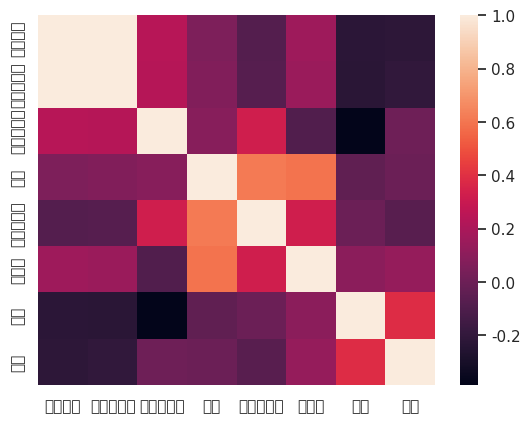

In [268]:
sns.heatmap(metro_full.corr(numeric_only=True))

### Data Analysis - Folium

In [269]:
# folium map에 범례를 추가하는 함수 - 참조 - https://stackoverflow.com/questions/65042654/how-to-add-categorical-legend-to-python-folium-map
def add_categorical_legend(folium_map, title, colors, labels):
    if len(colors) != len(labels):
        raise ValueError("colors and labels must have the same length.")

    color_by_label = dict(zip(labels, colors))

    legend_categories = ""
    for label, color in color_by_label.items():
        legend_categories += f"<li><span style='background:{color}'></span>{label}</li>"

    legend_html = f"""
    <div id='maplegend' class='maplegend'>
      <div class='legend-title'>{title}</div>
      <div class='legend-scale'>
        <ul class='legend-labels'>
        {legend_categories}
        </ul>
      </div>
    </div>
    """
    script = f"""
        <script type="text/javascript">
        var oneTimeExecution = (function() {{
                    var executed = false;
                    return function() {{
                        if (!executed) {{
                             var checkExist = setInterval(function() {{
                                       if ((document.getElementsByClassName('leaflet-top leaflet-right').length) || (!executed)) {{
                                          document.getElementsByClassName('leaflet-top leaflet-right')[0].style.display = "flex"
                                          document.getElementsByClassName('leaflet-top leaflet-right')[0].style.flexDirection = "column"
                                          document.getElementsByClassName('leaflet-top leaflet-right')[0].innerHTML += `{legend_html}`;
                                          clearInterval(checkExist);
                                          executed = true;
                                       }}
                                    }}, 100);
                        }}
                    }};
                }})();
        oneTimeExecution()
        </script>
      """


    css = """

    <style type='text/css'>
      .maplegend {
        z-index:9999;
        float:right;
        background-color: rgba(255, 255, 255, 1);
        border-radius: 5px;
        border: 2px solid #bbb;
        padding: 10px;
        font-size:12px;
        positon: relative;
      }
      .maplegend .legend-title {
        text-align: left;
        margin-bottom: 5px;
        font-weight: bold;
        font-size: 90%;
        }
      .maplegend .legend-scale ul {
        margin: 0;
        margin-bottom: 5px;
        padding: 0;
        float: left;
        list-style: none;
        }
      .maplegend .legend-scale ul li {
        font-size: 80%;
        list-style: none;
        margin-left: 0;
        line-height: 18px;
        margin-bottom: 2px;
        }
      .maplegend ul.legend-labels li span {
        display: block;
        float: left;
        height: 16px;
        width: 30px;
        margin-right: 5px;
        margin-left: 0;
        border: 0px solid #ccc;
        }
      .maplegend .legend-source {
        font-size: 80%;
        color: #777;
        clear: both;
        }
      .maplegend a {
        color: #777;
        }
    </style>
    """

    folium_map.get_root().header.add_child(folium.Element(script + css))

    return folium_map

In [270]:
## 지도에 공기질 / 승객수를 시각화 호선별로 확인
import branca.colormap as cm

# 대구 지도
daegu_map = folium.Map(location = [35.871380, 128.601743], zoom_start = 12, titles= 'daegu subway')

line_color = {1:'blue', 2:'green', 3:'orange'}
colormap = cm.LinearColormap(colors=['blue', 'red'], index=[0.0,1.0],vmin=0.0,vmax=1.0)


daegu_map = add_categorical_legend(daegu_map, '호선',
                             colors = [line_color[line] for line in range(1,3)],
                           labels = [f"{line}호선" for line in range(1,3)])



for name, lat, lng, num, air, train in zip(metro_full.역명, metro_full.경도, metro_full.위도, metro_full.총승객수, metro_full.공기질점수, metro_full.호선):
    folium.CircleMarker([lat, lng],
                        radius = num*40,
                        color = line_color[train],
                        fill=True,
                        fill_color= colormap(air),
                        fill_opacity=0.7,
                        weight = 3,
                        popup=name).add_to(daegu_map)


daegu_map

KeyError: ignored